### De imports

In [1]:
import multiprocessing
import matplotlib.pyplot as plt
import timeit
import numpy as np
import sys  
import concurrent.futures
import time

### merge_sort
In deze functie word de ingevoerde lijst van getallen in twee gesplitst en daarna wordt de merge_lists functie op die twee halve lijsten aangeroepen. Meer over de merge_lists functie hieronder.

In [2]:
def merge_sort(lijst):
    if len(lijst) <= 1:
        return lijst
    else: 
        midden = int(len(lijst)/2)
        links = merge_sort(lijst[:midden])
        rechts = merge_sort(lijst[midden:])
        
    return merge_lists(links, rechts)

### merge_lists
Hier worden de lijsten gesorteerd, ...

In [3]:
def merge_lists(links,rechts):
    l = 0 # teller voor linker helft, daarom l gekozen
    r = 0 # teller voor rechts
    resultaat = []
    while l < len(links) and r < len(rechts):
        if links[l] <= rechts[r]:
            resultaat.append(links[l])
            l += 1
        else:
            resultaat.append(rechts[r])
            r += 1
    while l < len(links):
        resultaat.append(links[l])
        l += 1
        #print(resultaat) # als je het stap voor stap wilt zien haal de '#' weg.
    while r < len(rechts):
        resultaat.append(rechts[r])
        r += 1
        #print(resultaat)
    resultaat += links[l:]
    resultaat += rechts[r:]
    return resultaat

### De output
Hier wordt de merge_sort functie aangeroepen met als parameter de lijst van getallen, ook wordt hier de output weergegeven.

In [4]:
lijst = [24, 8, 15, 3, 38, 12, 11, 7]
print(merge_sort(lijst))

[3, 7, 8, 11, 12, 15, 24, 38]


# Grote lijsten
Hier gaan we het algoritme testen op grotere lijsten van duizend, tien duizend, honderd duizend en één miljoen.

In [5]:
duizend = np.random.randint(1, 1000000, size=1000)
tien_duizend = np.random.randint(1, 1000000, size=10000)
honderd_duizend = np.random.randint(1, 1000000, size=100000)
miljoen = np.random.randint(1, 1000000, size=1000000)
duizend = duizend.tolist()
tien_duizend = tien_duizend.tolist()
honderd_duizend = honderd_duizend.tolist()
miljoen = miljoen.tolist()

### Test
Hier test ik of het merge sort algoritme het goed gesorteerd heeft, dat doe ik door het te vergelijken met de ingebouwde sorteer functie van Python.

Ook heb ik van één van de grote lijsten de uitkomst geprint om zo te laten zien dat het ook echt werkt.

In [6]:
print(merge_sort(duizend))

[1181, 1314, 2113, 2715, 3625, 3630, 4537, 6652, 7505, 7856, 8215, 8229, 9507, 11099, 11725, 12150, 12436, 14268, 14877, 15139, 17170, 17597, 18733, 19669, 20330, 22298, 22561, 22952, 23109, 24564, 25236, 25293, 26709, 27632, 27708, 28866, 29073, 31365, 31384, 31930, 32040, 33047, 33651, 34495, 34629, 35206, 35429, 35445, 36778, 38906, 40138, 41183, 41942, 42090, 42221, 42701, 43550, 43563, 43833, 46202, 46671, 46978, 47630, 48563, 48600, 49238, 51495, 51958, 52364, 52895, 54877, 55790, 56296, 57695, 58296, 60027, 60291, 60316, 60886, 61448, 63361, 63449, 63562, 63863, 63931, 64593, 66230, 66966, 67789, 68256, 68278, 69563, 70741, 74100, 74204, 74302, 75431, 76037, 78405, 78466, 78863, 79032, 81669, 81685, 82242, 83308, 84395, 84472, 85031, 85139, 85412, 86646, 88798, 90018, 90053, 90216, 90267, 90668, 95316, 95516, 95778, 97310, 98739, 99053, 99873, 100804, 101480, 103173, 104230, 105721, 108924, 109149, 109539, 113003, 113680, 113710, 114422, 116497, 117154, 117292, 117344, 118757, 1

In [7]:
sorted(duizend) == merge_sort(duizend)

True

In [8]:
sorted(tien_duizend) == merge_sort(tien_duizend)

True

In [9]:
sorted(honderd_duizend) == merge_sort(honderd_duizend)

True

In [10]:
sorted(miljoen) == merge_sort(miljoen)

True

### Threads
Hier worden het Threaded Merge Sort algoritme van hierboven uitgevoerd door verschillende hoeveelheden threads, met als doel om te zien of er veel verschil in de run time zit.

In [11]:
threads = [1, 2, 4, 8]

In [12]:
def split_lijst(lijst, threads):
    # https://stackoverflow.com/questions/752308/split-list-into-smaller-lists-split-in-half
    length = len(lijst)
    return [lijst[i*length // threads: (i+1)*length // threads] 
             for i in range(threads)]

In [13]:
def parallel(lijst, threads, show):
    with concurrent.futures.ThreadPoolExecutor(threads) as executor:
        lst_split = list(split_lijst(lijst, threads))
        #print(lst_split) #Als je wilt zien hoe de lijsten verdeeld zijn uncomment dit
        lst = executor.map(merge_sort, lijst)
        if show == True:
            print(merge_sort(duizend))

In [14]:
def tijd_meten(lijst, threads, x):
    # https://www.geeksforgeeks.org/time-perf_counter-function-in-python/
    duur = []
    for thread in threads:
        t1_start = time.perf_counter()
        parallel(lijst, thread, x)
        t1_stop = time.perf_counter()

        duur.append(t1_stop - t1_start)
        print("Finished in {} seconds for {} threads".format(t1_stop - t1_start, thread)) 
    return duur

In [15]:
print(tijd_meten(duizend, threads, True)) # test of hij goed gesort is

[1181, 1314, 2113, 2715, 3625, 3630, 4537, 6652, 7505, 7856, 8215, 8229, 9507, 11099, 11725, 12150, 12436, 14268, 14877, 15139, 17170, 17597, 18733, 19669, 20330, 22298, 22561, 22952, 23109, 24564, 25236, 25293, 26709, 27632, 27708, 28866, 29073, 31365, 31384, 31930, 32040, 33047, 33651, 34495, 34629, 35206, 35429, 35445, 36778, 38906, 40138, 41183, 41942, 42090, 42221, 42701, 43550, 43563, 43833, 46202, 46671, 46978, 47630, 48563, 48600, 49238, 51495, 51958, 52364, 52895, 54877, 55790, 56296, 57695, 58296, 60027, 60291, 60316, 60886, 61448, 63361, 63449, 63562, 63863, 63931, 64593, 66230, 66966, 67789, 68256, 68278, 69563, 70741, 74100, 74204, 74302, 75431, 76037, 78405, 78466, 78863, 79032, 81669, 81685, 82242, 83308, 84395, 84472, 85031, 85139, 85412, 86646, 88798, 90018, 90053, 90216, 90267, 90668, 95316, 95516, 95778, 97310, 98739, 99053, 99873, 100804, 101480, 103173, 104230, 105721, 108924, 109149, 109539, 113003, 113680, 113710, 114422, 116497, 117154, 117292, 117344, 118757, 1

In [16]:
res = tijd_meten(duizend, threads, False)

Finished in 0.016068499999999375 seconds for 1 threads
Finished in 0.043530999999999764 seconds for 2 threads
Finished in 0.014686400000000432 seconds for 4 threads
Finished in 0.015028700000000228 seconds for 8 threads


In [17]:
res2 = tijd_meten(tien_duizend, threads, False)

Finished in 0.2868916000000006 seconds for 1 threads
Finished in 0.2709758999999998 seconds for 2 threads
Finished in 0.2418730999999994 seconds for 4 threads
Finished in 0.5176257 seconds for 8 threads


In [18]:
res3 = tijd_meten(honderd_duizend, threads, False)

Finished in 4.090839099999998 seconds for 1 threads
Finished in 3.1893952999999993 seconds for 2 threads
Finished in 3.6541663 seconds for 4 threads
Finished in 5.5948682000000005 seconds for 8 threads


In [19]:
res4 = tijd_meten(miljoen, threads, False)

Finished in 46.93047109999999 seconds for 1 threads
Finished in 38.162302100000005 seconds for 2 threads
Finished in 41.61256429999999 seconds for 4 threads
Finished in 49.83243999999999 seconds for 8 threads


### Grafiek
hier is een grafiek gemaakt met als invoer de tijden van de test hierboven. De data die in de grafiek weergegeven is zijn de resulaten van de tests hierboven. Ik heb er twee losse grafieken van gemaakt, één met de lijsten van duizend, tien duizend en honderd duizend en één met alleen de miljoen. Dat heb ik gedaan omdat de lijst van een miljoen zo lang duurt vergeleken de andere waardoor de grafiek niet meer goed leesbaar is.

In [20]:
def grafiek(show_miljoen):
    if show_miljoen == True:  
        plt.plot(threads, res4, label = "Miljoen")
    else:
        plt.plot(threads, res, label = "Duizend")
        plt.plot(threads, res2, label = "Tien duizend")
        plt.plot(threads, res3, label = "100 duizend")
    plt.xlabel('Threads')
    plt.ylabel('Duur in seconden')
    plt.title('tijdsduur met verschillende hoeveelheden threads')
    plt.legend()

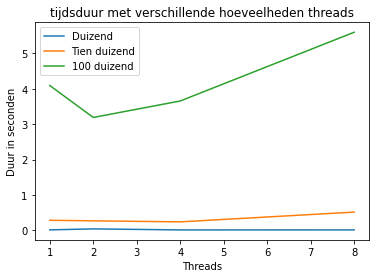

In [21]:
grafiek(False)

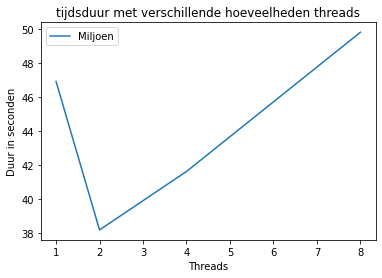

In [22]:
grafiek(True)

### Hoeveel ruimte neemt het in?
Hier gaan we kijken hoeveel ruimte de functie inneemt met verschillende lengte lijsten. We kijken naar het aantal Bytes dat het geheugen gebruikt.

In [23]:
sys.getsizeof(merge_sort(duizend))

9016

In [24]:
sys.getsizeof(merge_sort(tien_duizend))

87616

In [25]:
sys.getsizeof(merge_sort(honderd_duizend))

824456

In [26]:
sys.getsizeof(merge_sort(miljoen))

8697456

#### Ontwerpen
Hier zijn mijn ontwerpen die ik gemaakt heb, hier is te zien hoe ik de werkload zou verdelen over de verschillende threads.
Elke hokje is één thread, als er iets niet in een hokje staad betekend dat dat gedaan wordt door de eerste thread.
De complexiteit van het merge sort algoritme is: O(nlogn)

bron van de complexiteit: https://softwareengineering.stackexchange.com/questions/297160/why-is-mergesort-olog-n#:~:text=The%20complexity%20of%20merge%20sort,and%20NOT%20O(logn).&text=The%20divide%20step%20computes%20the,for%20even%20n)%20elements%20each.
Er is geen bron voor de ontwerpen: ik heb het zelf bedacht

![merge](ontwerpen/merge.png)

Bij één thread kan er niks verdeeld worden, daarom zijn hier geen vakjes getekend en wordt alles door één thread gedaan

![merge2](ontwerpen/merge2.png)

Aantal threads: 2 
Size per thread: n/2 (n = aantal getallen in rij)

![merge4](ontwerpen/merge4.png)

Aantal threads: 4 
Size per thread: n/4 (n = aantal getallen in rij)

![merge8](ontwerpen/merge8.png)

Aantal threads: 8 
Size per thread: n/8 (n = aantal getallen in rij) 

### Conclusie 
Het maakt weinig verschil in hoeveel threads je gebruikt bij deze opdracht, de verschillen zijn zo klein dat het niet te merken is voor de mens. Deze uitkomst vond ik erg apart, ik had namelijk verwacht dat 2 keer de kracht 2 keer zo snel zou gaan, niet dus. Daarom heb ik wat onderzoek gaan doen en ben ik deze video tegengekomen: https://www.youtube.com/watch?v=Obt-vMVdM8s.
In deze video wordt in de eerste 10 minuten veel uitgelegd over de GIL, na 10 minuten was ik mijn concentratie al weer kwijt en ging ik maar een website zoeken waar de GIL sneller en of beter wordt uitgelegd. Toen kwam ik op deze site: https://realpython.com/python-gil/. Daar blijkt al snel waarom de GIL is toegevoegd, namelijk voor memory management. Maar met die oplossing kwamen ook een paar nadelen, namelijk dat Python nu niet echt meer geschikt is om parallel taken uit te voeren